# ARIMA Model Fit

### Autoregression Intuition
* AutoCorrelation Function(ACF): correlation for time series observations with observations with previous time steps, called lags.
* Partial Autocorrelation Function(PACF): The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove.
* Consider a time series that was generated by an autoregression (AR) process with a lag of k.
* We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
* This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.
* We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.
* This is exactly the expectation of the ACF and PACF plots for an AR(k) process.
###  Moving Average Intuition
* Consider a time series that was generated by a moving average (MA) process with a lag of k.
* Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions.
* Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.
* We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.
* For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.
* Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process

            Value
Date             
2010-01  1.002538
2010-01  1.004645
2010-01  0.995360
2010-01  1.010922
2010-01  1.007484


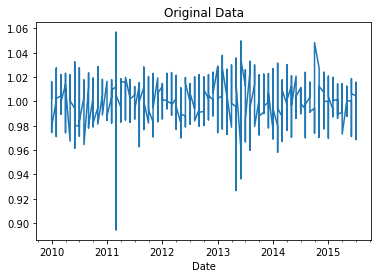

Results of ADF test for original data:
ADF Statistic: %f -20.04168321553118
p-value: %f 0.0
Reject the null hypothesis (H0) at 5 % level of     significance. The data does not have a unit root and is stationary


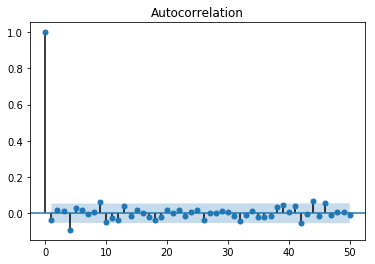

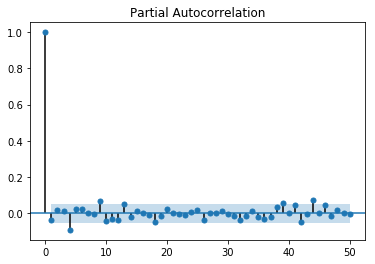

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                 1375
Model:                     ARMA(0, 0)   Log Likelihood                3980.541
Method:                           css   S.D. of innovations              0.013
Date:                Thu, 19 Nov 2020   AIC                          -7957.082
Time:                        23:09:41   BIC                          -7946.629
Sample:                    01-31-2010   HQIC                         -7953.171
                         - 07-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0006      0.000   2772.634      0.000       1.000       1.001


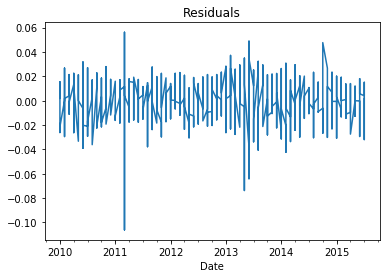

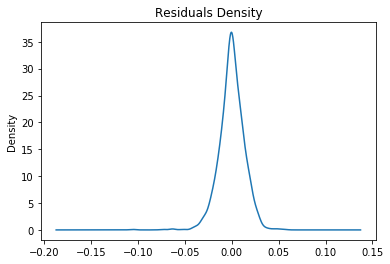

In [27]:
# Import libraries
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARIMA

# Download data
df = pd.read_csv('Nikkei.csv')
# Set date index properly
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.index = pd.DatetimeIndex(df.index).to_period('M')

# Check original data.
print(df.head())
df.plot(legend = False, title = 'Original Data')
pyplot.show()

# Apply Augmented Dickey-Fuller Test to original data
adf_result_before_differencing = adfuller(df['Value'])
print('Results of ADF test for original data:')
print('ADF Statistic: %f', adf_result_before_differencing[0])
print('p-value: %f', adf_result_before_differencing[1])
if adf_result_before_differencing[1] >= 0.05:
    print ('Fail to reject the null hypothesis (H0) at 5 % level of \
    significance. The data has a unit root and is non-stationary')
else:
    print ('Reject the null hypothesis (H0) at 5 % level of \
    significance. The data does not have a unit root and is stationary')
    
# Plot ACF
tsaplots.plot_acf(df['Value'], lags=50)
pyplot.show()

# Plot PACF
tsaplots.plot_pacf(df['Value'], lags=50)
pyplot.show()    

# Implement ARIMA(0,0,0)
model = ARIMA(df, order=(0, 0, 0))
model_fit = model.fit(disp=0)
print (model_fit.summary())

# plot residual errors

residuals = model_fit.resid
residuals.plot(title = 'Residuals')
pyplot.show()
residuals.plot(title = 'Residuals Density', kind='kde')
pyplot.show()

## Resume
1. As we can see original data looked like a white noise, so the ADF test confirms the stationarity.
2. This means that the difference is not required. Hence, ARIMA will be actually ARMA model.
3. ACF and PACF shows that the time-series is actually a white noise.
4. Since nothing was done we can conclude that ARIMA(0,0,0) (for the log price). Assuming that model is true, the predictions will depend heavily on the mean or intercept parameter.
5. On the other hand, if we do believe that stock returns are "more predictable" then you might look to models that are not in the ARIMA family.
6. I assume that the initial data may be already converted to white noise.
